<a href="https://colab.research.google.com/github/milanmaglov/PPPO/blob/main/Milan_MaglovIT75_2019_Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leaf Classification

**Student**: Milan Maglov

**Predmet**: Principi prezentacije i prepoznavanje oblika

# **Uvod**

Razlika između mašinskog učenja i kompjuterske vizije (Computer Vision)

Mašinsko učenje (ML) je razvoj algoritama i povezanih sistema koji mogu učiti strategije ponašanja unutar određenih okruženja putem instrukcija i skupova podataka za obuku.

Kako je mašinsko učenje je podskup veštačke inteligencije, ali postoje ključne razlike između mašinskog učenja i tradicionalnog poimanja veštačke inteligencije. Naime mašinsko učenje se koristi za učenje i obučavanje mašina za raznoliku količinu industrija i okruženja kao na primer: prodaja, supply chain, građevina, prehrambena industrija.

Postoji nekoliko prilaza mašinskom učenju. Svaki od njih koristi algoritme i prepoznavanje šablona pomoću kojeg se donose strateške odluke, a to su:



*   **Nadgledano učenje**:
U ovom prilazu pravi se sistem koji ima poznat ulaz i očekivani izlaz. Na osnovu očekivanog izlaza treba da napravi najoptimalniji rezultat
*   **Nenadgledano učenje:** Kao što samo ime kaže ovaj prilaz se koristi na nestruktuiranim setovima podataka gde izlazi nisu idealno napravljeni. ML sistemi u tom slučaju imaju slobodu da samostalno otkriju šablone.

*   **Učenje pojačanja:** Ovaj prilaz se pretežno koristi u onlajn igricama sa više korisnika. Zasniva se na nagrađivanju podobnih rezultata i kažnjavanju nepoželjnih.

*   **Duboko učenje i neuronske mreže:** Prilaz koji je nastao 1980ih kao odgovor na dotadašnji linearni i iterativni prilaz mašinskom učenju. Zasniva se na pravljenju node-cluster struktura i strategija zasnovanih na težini. Na ovaj način ML sistemi kompleksne probleme parčaju u manje i rešenja manjih problema zajedno daju konačni odgovor na početni veliki problem.

**Kompjuterska vizija**

Kompjuterska vizija je podskup mašinskog učenja.Nakon što je interesovanje za istraživanje veštačke inteligencije i mašinskog učenja opalo od sredine 1980-ih do sredine 1990-ih, mnogo razvoja u ovom polju se fragmentisalo u podoblasti poput obrade prirodnog jezika, prepoznavanja slika i robotike.

Takođe, kompjuterska vizija se može definisati kao podskup dubokog učenja. Umesto obrade simuliranih podataka ili statistika, kompjuterska vizija razlaže i interpretira vizuelne informacije.

Kompjuterska vizija je primena mašinskog učenja i veštačke inteligencije koja koristi informacije iz digitalnih slika i video snimaka kako bi donela značajne odluke na osnovu tih informacija.







**Projektni zadatak:** Klasifikacija listova

> Klasifikacija je jedan od osnovnih zadataka u kompjuterskoj viziji.
Klasifikacija je zadatak spajanje jedne ili više osobina nekoj slici. Potrebno je da kroz ML sisteme računar sliku shvati kao celinu.

Za ovaj zadatak korišćen je set podataka na mom drajvu: https://drive.google.com/drive/u/0/folders/17VJIHGMMtbUpAYBiOypjwsjB3ZDWdjSu

Za ovaj projekat korišćeno je pet algoritama za klasifikaciju:
SGD Classifier, Random Forest Classifier, XGB Classifier, Kneighbors Classifier, SVM

Pored njih takođe sam probao problem da rešim pomoću logističke regresije.


**Rad**

Prvo je potrebno da povežemo google drive i google colab.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Zatim je potrebno da preuzmemo podatke pomoću pandas dadoteke pajtona


In [ ]:
import os


print(os.getcwd())
os.chdir('drive')
os.chdir('MyDrive')
print(os.getcwd())

os.listdir()


/content
/content/drive/MyDrive


['train.csv',
 'test.csv',
 'sample_submission.csv',
 '1',
 '2',
 'Classroom',
 'Colab Notebooks',
 'images']

In [ ]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


Keras preprocessing je potreban za rad sa slikama i podacima. Unutar njega se nalaze metode za pripremu i obradu podataka pre nego što se oni puštaju u metode mašinskog učenja

In [ ]:
len(os.listdir('images'))

1584

U sledećem koraku sam putem biblioteke Matplotlib bolje vizualizovao slike koje su date kao dataset za ovaj projekat

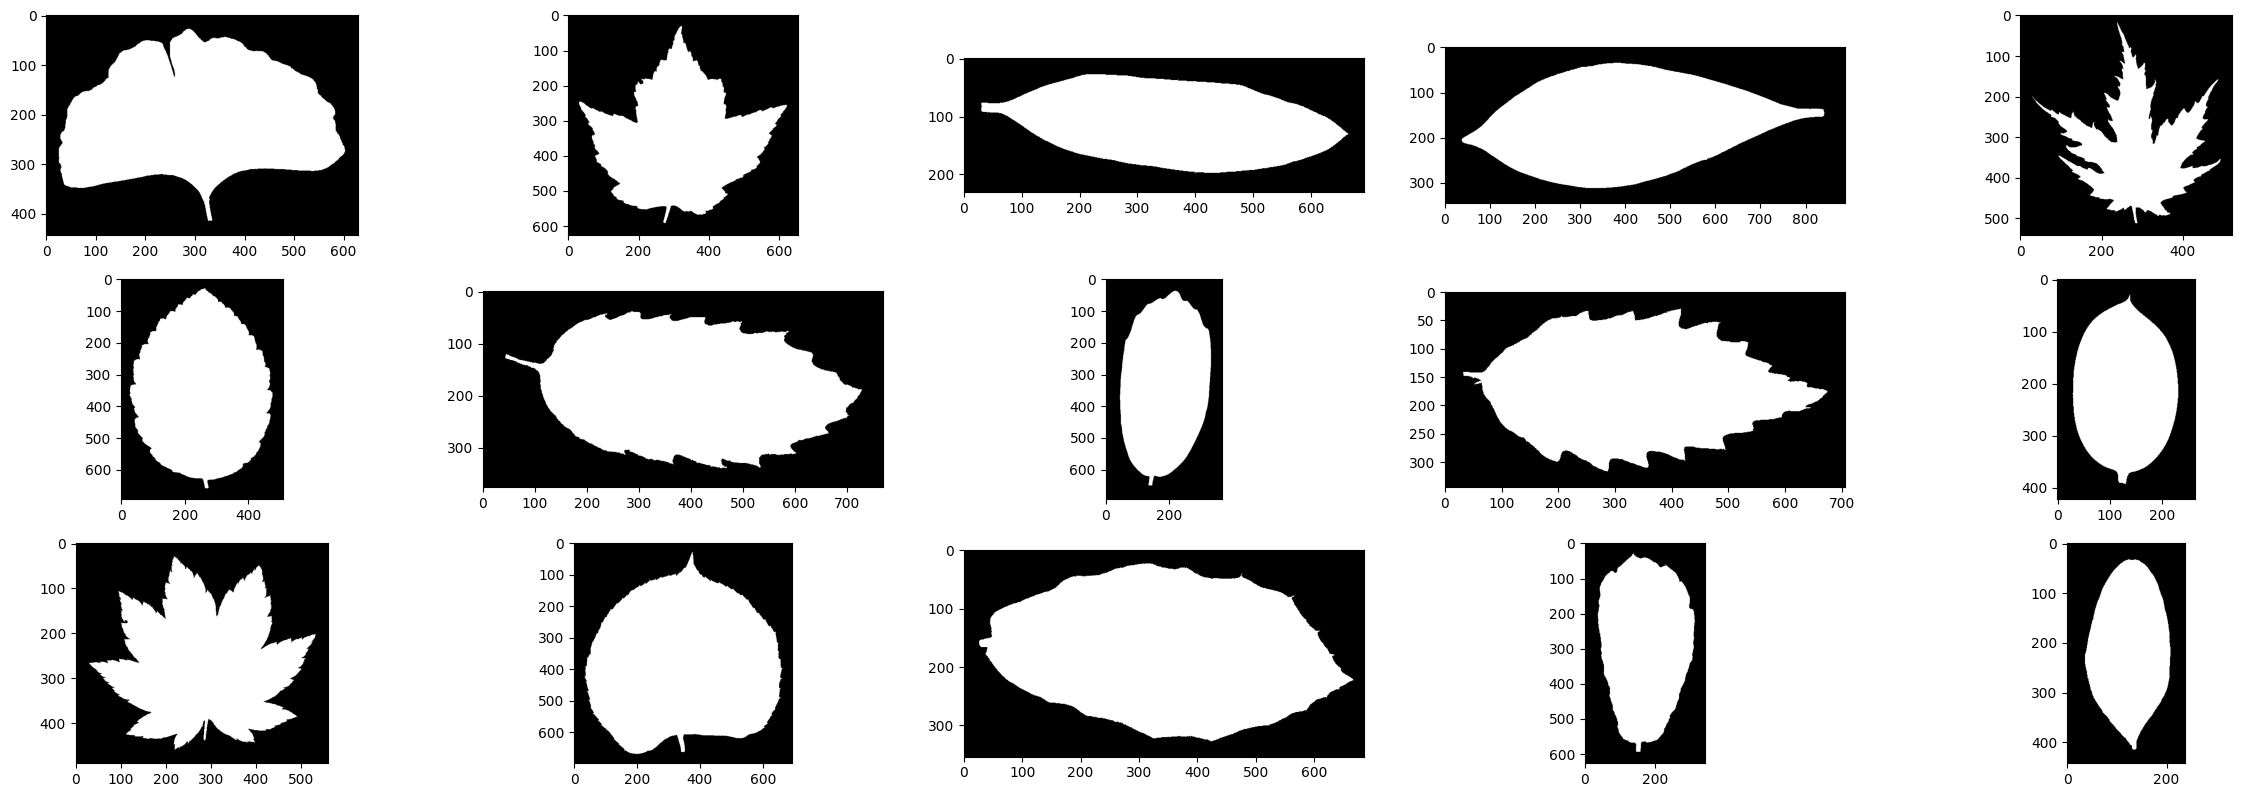

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing.image import load_img

plt.figure(figsize=(30,20))
for i in range(15):
  brojac=np.random.choice((os.listdir('images')))
  plt.subplot(6,5,i+1)
  img = load_img(os.path.join('images',brojac))
  plt.imshow(img)

Dalje sam iz fajla sa trening podacima preuzeo i iščitao iste

In [ ]:
import pandas as  pd

frame = pd.read_csv('train.csv',index_col = False) #ne koristi prvu kolonu kao indeks
frameTest = pd.read_csv('test.csv', index_col = False)

In [ ]:
frame.head()


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
frameTest.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.core.dtypes.common import classes

encoder = LabelEncoder()
le = encoder.fit(frame.species)
labels = le.transform(frame.species)
classes = list(le.classes_)
print(classes)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [ ]:
print(labels)

[ 3 49 65 94 84 40 54 78 53 89 98 16 74 50 58 31 43  4 75 44 83 84 13 66
 15  6 73 22 73 31 36 27 94 88 12 28 21 25 20 60 84 65 69 58 23 76 18 52
 54  9 48 47 64 81 83 36 58 21 81 20 62 88 34 92 79 82 20 32  4 84 36 35
 72 60 71 72 52 50 54 11 51 18 47  5  8 37 97 20 33  1 59  1 56  1  9 57
 20 79 29 16 32 54 93 10 46 59 84 76 15 10 15  0 69  4 51 51 94 36 39 62
  2 24 26 35 25 87  0 55 34 38  1 45  7 93 56 38 21 51 75 81 74 33 20 37
  9 40 60 31 83 50 71 67 30 66  1 43 61 23 65 84 87 46 57 16  2 28 12 96
 44 76 29 75 41 87 67 61 30  5 12 62  3 83 81  6 85  4 37 57 84 39 71 61
  6 76 14 31 98 40 17 51 16 42 63 86 37 69 86 71 80 78 14 35 25  5 39  8
  9 26 44 60 13 14 77 13 80 87 18 60 78 92 51 45 78 41 51 30 14 35 46 21
  8  6 92 38 40 15 32 17 93 71 92 27 78 15 19 60 21 38 36 49 74 67 95 31
 82 45 16 83 63 80 42 22 74 53 15 44 47 57 94 76 17 32 24 15 93 24 80 59
 46 12 51 77 79 70 69 16  2 63 83 55 12 53  1 67  0  2 36 42 10  9 52 59
  6 22 86 31 51 37 43 75 90 24 86 96 45 32 98 36 66

LabelEncoderom smo vrednosti species kolone konvertovali u numeričke vrednosti. Le.transform funkcija je u dateframeu frame promenila vrednosti za species u njihove odgovarajuće numeričke vrednosti

In [ ]:
print(frameTest.columns)

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)


In [ ]:
frame = frame.drop(['id', 'species'],axis = 1)
testID = frameTest.id
frameTest = frameTest.drop(['id'],axis = 1)

Kod iznad se koristi za izbacivanje id i species kolona iz dataframea, a ispod se nalazi vizuelni prikaz dataframe nakon promene

In [ ]:
frame

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,0.000000,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,0.001953,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


In [ ]:
frameTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB


Nakon što su svi podaci izvučeni, treba da proverimo koliko jedinstvenih vrsti biljaka je pronađeno. To radimo pomoću unique metode prilikom rada sa nizovima
Vidimo da ima 99 različitih vrsta listova odnosno biljaka

In [ ]:
BL= np.unique(labels)
print(BL)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


## Logistička Regresija

 Pokušaj da se problem reši logističkom regresijom

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(frame) #koristi se da se vrednosti standardizuju

In [ ]:
frame = scaler.transform(frame)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 100, solver = 'lbfgs', multi_class ='multinomial') #funkcija koja poziva logisticku regresiju
#u ovom slucaju koristi se 100 iteracija algoritma The Limited-memory Broyden-Fletcher-Goldfarb-Shanno a multiclass označava da vrednosti mogu biti između 0 i 1 u beskonačno mnogo članova


In [ ]:
clf.fit(frame,labels)#spaja klase i logističku regresiju

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
x_test = frameTest.values
x_test

array([[0.019531, 0.009766, 0.078125, ..., 0.      , 0.003906, 0.053711],
       [0.007812, 0.005859, 0.064453, ..., 0.000977, 0.037109, 0.044922],
       [0.      , 0.      , 0.001953, ..., 0.015625, 0.      , 0.      ],
       ...,
       [0.017578, 0.029297, 0.015625, ..., 0.      , 0.042969, 0.006836],
       [0.013672, 0.009766, 0.060547, ..., 0.      , 0.011719, 0.018555],
       [0.      , 0.11719 , 0.      , ..., 0.015625, 0.      , 0.017578]])

In [ ]:
x_test = scaler.transform(x_test)
y_test = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
sub = pd.DataFrame(y_test, index = testID, columns = le.classes_)

In [ ]:
sub.head(2)

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,0.000008,0.000018,1.117020e-07,0.000128,0.000012,0.000030,1.007753e-07,0.000001,0.000003,0.000070,...,2.313260e-08,0.000010,0.000005,1.428565e-06,1.723372e-05,4.799376e-07,1.507400e-07,3.288327e-08,0.000454,0.000001
7,0.000013,0.000019,1.186438e-04,0.000827,0.000005,0.000034,1.355669e-03,0.000009,0.000025,0.000013,...,4.482731e-05,0.000096,0.000001,8.721881e-07,3.267166e-08,8.102365e-04,3.286114e-05,9.210151e-04,0.000003,0.000049


# **Klasifikacija pomoću postojećih modela**

In [ ]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(frame,labels,test_size= 0.21, shuffle=True, stratify =labels)


In [ ]:
a_train

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
362,0.064453,0.175780,0.013672,0.000000,0.000000,0.187500,0.003906,0.000000,0.005859,0.003906,...,0.095703,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977
102,0.001953,0.005859,0.007812,0.005859,0.035156,0.042969,0.027344,0.005859,0.005859,0.021484,...,0.001953,0.000000,0.000977,0.009766,0.048828,0.001953,0.000000,0.012695,0.015625,0.033203
148,0.011719,0.015625,0.037109,0.011719,0.013672,0.013672,0.013672,0.000000,0.009766,0.019531,...,0.003906,0.000000,0.003906,0.007812,0.017578,0.000000,0.000000,0.001953,0.023438,0.010742
960,0.003906,0.000000,0.013672,0.029297,0.007812,0.005859,0.019531,0.000000,0.000000,0.019531,...,0.000000,0.000000,0.013672,0.000000,0.019531,0.000000,0.000000,0.003906,0.029297,0.055664
36,0.042969,0.083984,0.000000,0.000000,0.001953,0.074219,0.037109,0.000000,0.000000,0.062500,...,0.000000,0.000000,0.000977,0.000000,0.011719,0.000000,0.000000,0.004883,0.000000,0.001953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0.003906,0.005859,0.015625,0.009766,0.003906,0.000000,0.015625,0.003906,0.001953,0.011719,...,0.085938,0.000977,0.000977,0.000977,0.006836,0.000000,0.019531,0.001953,0.004883,0.054688
269,0.000000,0.000000,0.066406,0.105470,0.015625,0.000000,0.000000,0.000000,0.019531,0.001953,...,0.031250,0.018555,0.012695,0.006836,0.011719,0.000000,0.000000,0.019531,0.002930,0.026367
120,0.005859,0.001953,0.058594,0.058594,0.005859,0.000000,0.021484,0.000000,0.011719,0.023438,...,0.170900,0.000000,0.038086,0.000000,0.002930,0.000000,0.000000,0.000000,0.000000,0.012695
403,0.042969,0.080078,0.037109,0.007812,0.000000,0.056641,0.013672,0.000000,0.011719,0.017578,...,0.000000,0.000000,0.000000,0.000977,0.019531,0.000000,0.001953,0.042969,0.006836,0.047852


In [ ]:
b_train

array([37, 93, 83, 85, 21, 76, 48, 15, 64, 60, 70, 94, 88,  0, 10, 41, 26,
       69, 74, 68, 13, 82, 45, 49, 87,  4, 91, 88, 58, 62, 50, 39, 22, 10,
       39, 83, 22, 28,  7, 68, 25, 24, 18, 85,  4, 77, 19, 11, 44, 65, 92,
       59, 16, 10, 89, 80, 66, 89, 32, 61, 73, 66, 57, 98,  4, 96, 84, 18,
       76, 48, 97, 65, 25, 72, 93, 83,  1, 30, 90, 81, 87, 49, 13, 46, 72,
       35, 60, 71, 69, 29, 55,  8, 74, 94,  2, 59, 27, 23, 39, 53, 22, 96,
       34, 82, 61, 69, 76, 44,  8, 24, 91, 24, 31, 38, 77, 67, 21, 29, 71,
       44,  2, 55, 26, 27, 61, 84,  9, 36,  9,  5, 79, 52, 75, 21, 15, 56,
       46, 10, 73, 26, 29, 73, 75, 20,  8, 85, 42, 55, 14, 36, 94,  9, 61,
       46, 58, 38, 16, 52, 34, 60, 79, 80, 77,  0, 39, 90, 21, 14, 92, 55,
       13, 16, 56, 85, 38,  5, 20, 13,  0, 33, 31, 25, 50, 24, 95, 86, 33,
       78, 86, 40, 97,  0, 20, 28, 39, 18, 22, 75, 75, 77, 94, 67, 81, 26,
       70, 11, 59, 11, 78, 21,  6, 63, 17, 61, 90, 13,  6, 98,  6, 23, 19,
       76, 95, 91, 28, 43

Ovim kodom smo podatke podelili na validacione i trening podatke.

Frame i labels se koriste kao osnova odakle se podaci uzimaju.
Test_size se koristi da odredi veličinu validacionog skupa

Ispod je primer korišćenja SGD classifier algoritma

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model_1 = make_pipeline(StandardScaler(), SGDClassifier())

print(model_1.fit(a_train,b_train))

print(model_1.score(a_test,b_test))


b_pred = model_1.predict(a_test)
cm = confusion_matrix(b_test, b_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
0.9759615384615384
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


Treniranje korišćenjem RandomForestClassifier algoritma

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = make_pipeline(StandardScaler(), RandomForestClassifier())

print(model_2.fit(a_train,b_train))

print(model_2.score(a_test,b_test))

y_pred = model_2.predict(a_test)
cm = confusion_matrix(b_test, b_pred)
print(cm)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])
0.9759615384615384
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


Treniranje pomoću KNeighborsClassifier algoritma

In [ ]:
from sklearn import neighbors
model_3 = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier())

print(model_3.fit(a_train,b_train))

print(f'score Model:',model_3.score(a_test,b_test))

y_pred = model_3.predict(a_test)
cm = confusion_matrix(b_test, b_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])
score Model: 0.9807692307692307
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


Treniranje korišćenjem XGBClassifier algoritma


In [ ]:
import xgboost as xgb
model_4 = make_pipeline(StandardScaler(),xgb.XGBClassifier())

print(model_4.fit(a_train,b_train))

print(f'score Model:',model_4.score(a_test,b_test))

y_pred = model_4.predict(a_test)
cm = confusion_matrix(b_test, b_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_

Treniranje korišćenjem SVM algoritma


In [ ]:
from sklearn import svm
model_5= make_pipeline(StandardScaler(),svm.SVC(gamma=0.001, C=100.))

print(model_5.fit(a_train,b_train))

print(f'score Model:',model_5.score(a_test,b_test))

b_pred = model_5.predict(a_test)
cm = confusion_matrix(b_test, b_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001))])
score Model: 1.0
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
models = pd.DataFrame({
    'Model': ['SGDClassifier','Random Forest Classifier','K Neighbors Classifier', 'XGB Classifier',
              'svm'],

    'Score': [model_1.score(a_test,b_test)*100,
              model_2.score(a_test,b_test)*100,
              model_3.score(a_test,b_test)*100,
              model_4.score(a_test,b_test)*100,
              model_5.score(a_test,b_test)*100]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,XGB Classifier,87.980769
0,SGDClassifier,97.596154
1,Random Forest Classifier,97.596154
2,K Neighbors Classifier,98.076923
4,svm,100.000000


U mom primeru najtačniji je bio Random Forest Classifier stoga sam uzeo njega za konačni primer prikaza rešenja

In [ ]:
test_pred = model_5.predict(frameTest)

In [ ]:
print(test_pred)

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 90 60 17 75 27 51 31 39 23 68  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 69 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 92 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 90 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 87 95  3 35 83 60 59 58  0 50 62 38 93 68 55

In [ ]:
output = pd.DataFrame({'ID': testID,
                       'Vrsta':test_pred,
                        })
output.head(10)


,ID,Vrsta
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14
5,16,3
6,19,3
7,23,28
8,24,84
9,28,8


# **Zaključak**

Prilikom izrade ovog projekta korišćeno je više prilaza rešenju. Data su i dva uvida u rešenjue. Prilikom korišćenja logisčke regresije date su šanse za pripadanje svakoj klasi, a korišćenjem već postojećih algoritama za klasifikaciju data su konkretna rešenja odnosno pretpostavke rešenja.

Klasifikacija je jedan od najčešćih problema mašinskog učenja. U ovom projektu sam uočio da je mašinsko učenje već sada na približnom nivou ljudskom shvatanju problema klasifikacije.


# **Reference**

[1] M. Nikolić, A. Zečević. Mašinsko učenje. Beograd, 2019. (http://ml.matf.bg.ac.rs/readings/ml.pdf)

[2] https://www.ibm.com/topics/logistic-regression

[3]https://www.kdnuggets.com/2022/04/logistic-regression-classification.html

[4]https://saturncloud.io/

[5] https://www.weka.io/learn/ai-ml/computer-vision-vs-machine-learning/

[6]https://www.sciencedirect.com/science/article/pii/S1877050920308218